# Look at Gridded NEXRAD Data
This is NEXRAD data from AWS (NOAA/Unidata) that has been gridded by Scott Collis using PyART

In [41]:
import xarray as xr
from distributed import Client, LocalCluster
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
cluster = LocalCluster()
client = Client(cluster)
cluster

/Users/mgrover/opt/anaconda3/envs/tracer-dev/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52130 instead
  warnings.warn(


LocalCluster(a1781979, 'tcp://127.0.0.1:52131', workers=4, threads=12, memory=16.00 GiB)

## Spin up a Cluster

In [55]:
ds = xr.open_mfdataset('../../data/nexrad-grid/xxx*')

In [58]:
ds_lat_lon = ds.set_index(x='lon',
                          y='lat')

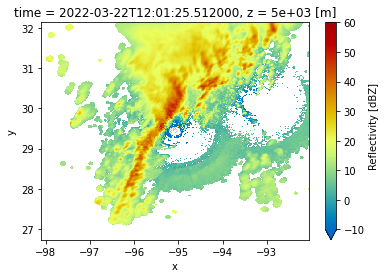

In [65]:
ds_lat_lon.isel(z=10, time=0).reflectivity.plot(cmap='pyart_HomeyerRainbow',
                                                vmin=-10,
                                                vmax=60)

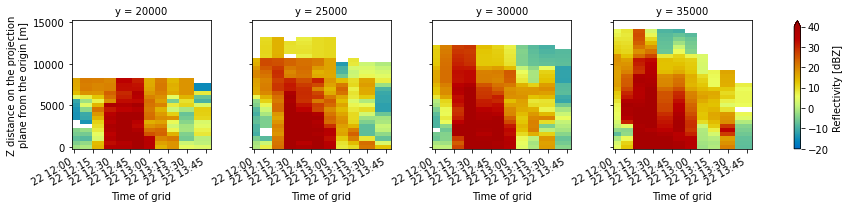

In [47]:
ds.sel(x=0, y=range(20000, 40000, 5000)).reflectivity.plot(x='time',
                                                           col='y',
                                                           vmin=-20,
                                                           vmax=40,
                                                           cmap='pyart_HomeyerRainbow');